<a href="https://colab.research.google.com/github/arulami/Aerofit-Business-Case/blob/main/Aerofit_BusinessCase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aerofit Business Case Study

## Objective
Aerofit wants to identify the target audience characteristics for each treadmill product (KP281, KP481, KP781) and recommend suitable treadmills to new customers.  

We will use descriptive analytics to:
- Perform exploratory data analysis (EDA)
- Detect outliers and study distributions
- Build customer profiles for each product
- Construct contingency tables and compute probabilities
- Derive actionable business insights

1. Import Libraries & Dataset

In [ ]:
# Data & analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("aerofit_treadmill.csv")

# Basic checks
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


### Dataset Info
Inspect the dataset structure, data types, and check for missing values.

In [ ]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


2. Univariate Analysis

### Univariate Analysis
Analyze each variable separately to understand distributions.
- **Categorical variables**: Product Purchased, Gender, MaritalStatus
- **Numerical variables**: Age, Education, Usage, Income, Fitness, Miles

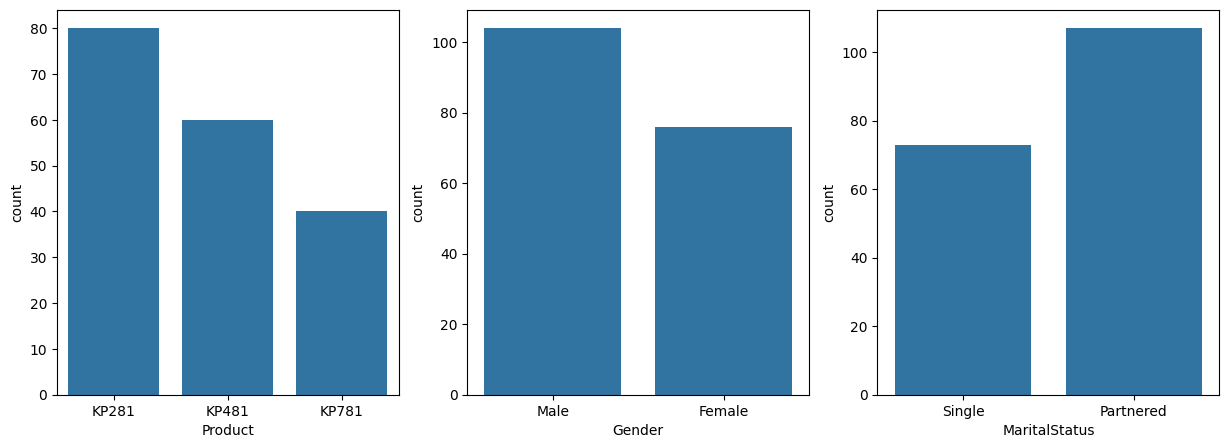

In [ ]:
# Countplots for categorical
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(x="Product", data=df, ax=axes[0])
sns.countplot(x="Gender", data=df, ax=axes[1])
sns.countplot(x="MaritalStatus", data=df, ax=axes[2])
plt.show()

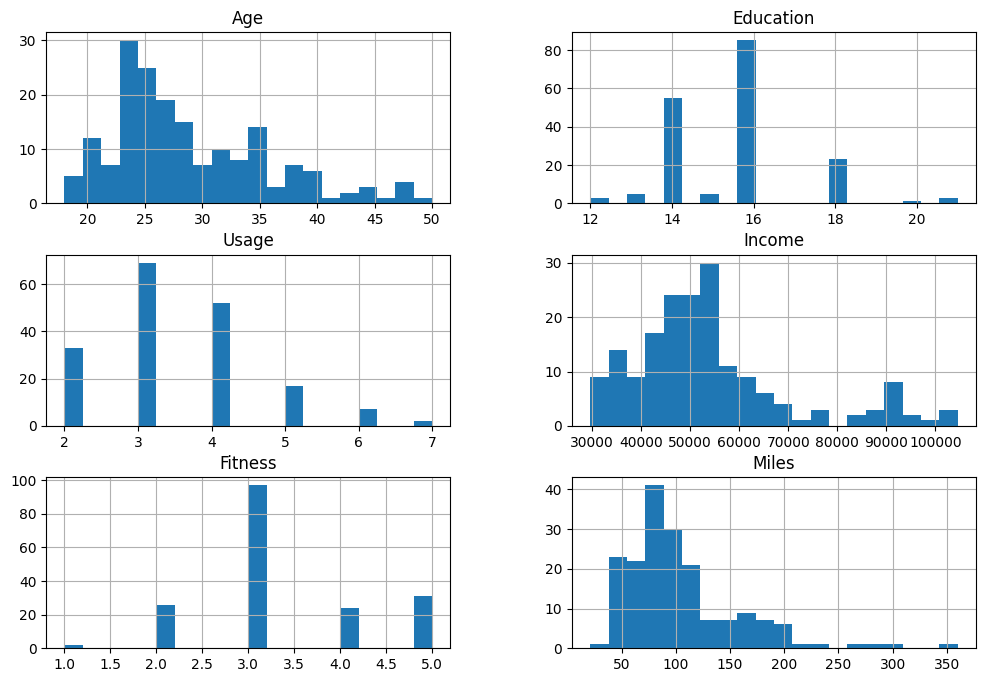

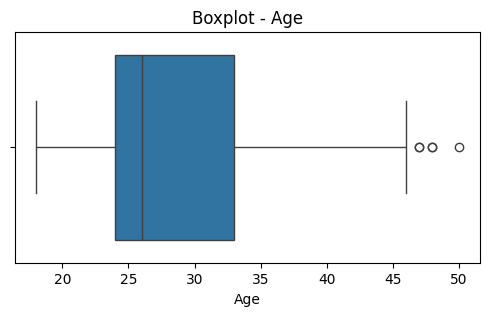

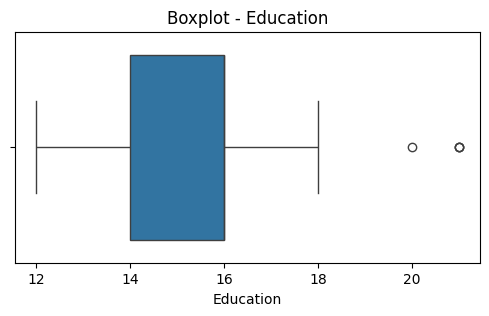

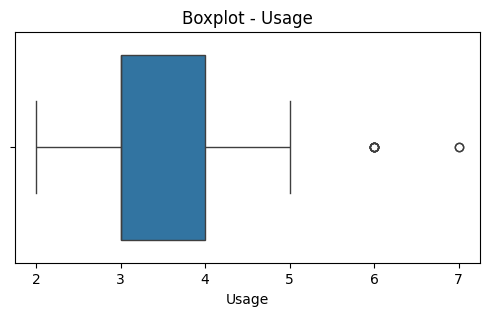

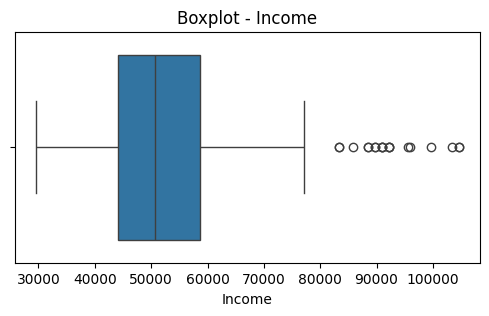

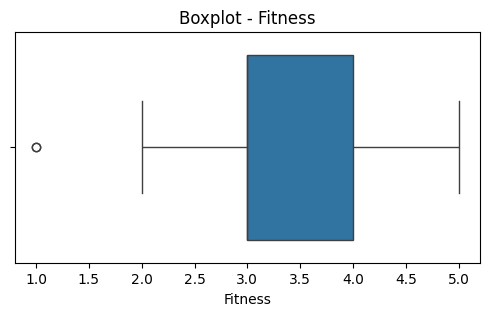

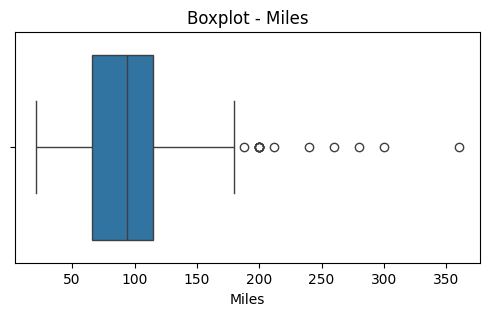

In [ ]:
# Histograms & Boxplots for numerical
num_cols = ["Age", "Education", "Usage", "Income", "Fitness", "Miles"]

df[num_cols].hist(figsize=(12, 8), bins=20)
plt.show()

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot - {col}")
    plt.show()

3. Bivariate Analysis

### Bivariate Analysis
Check relationships between treadmill products and customer characteristics.

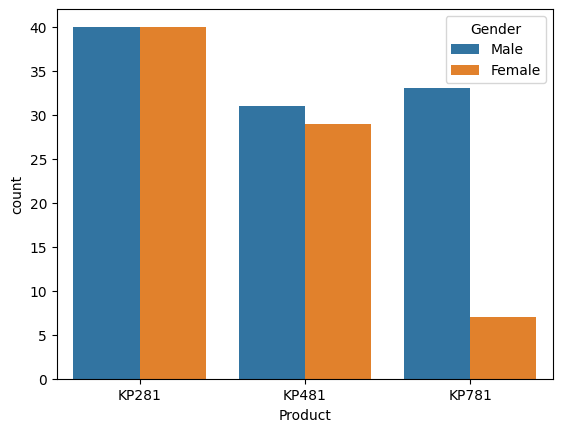

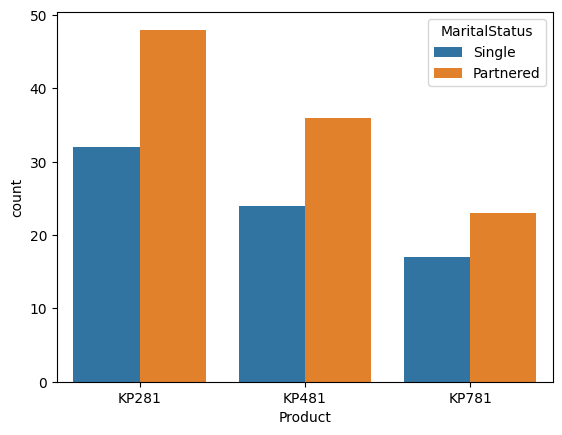

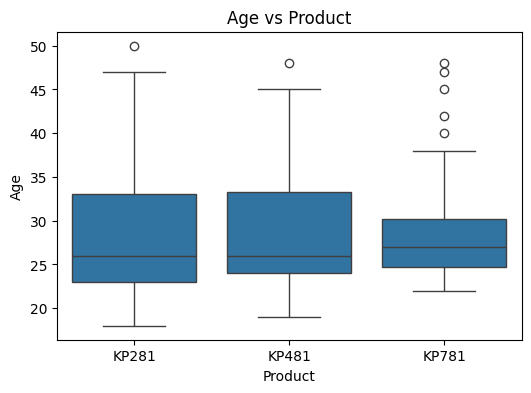

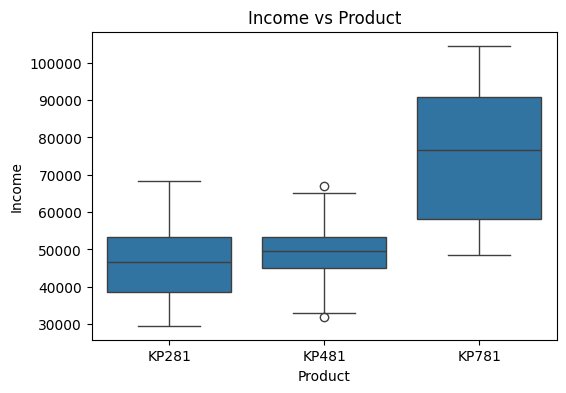

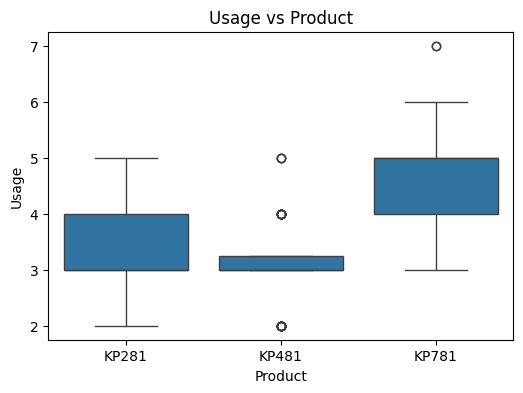

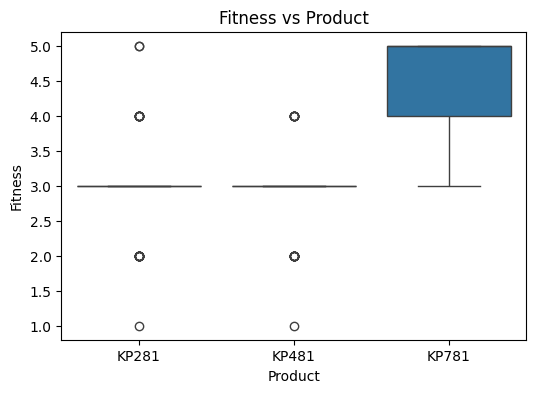

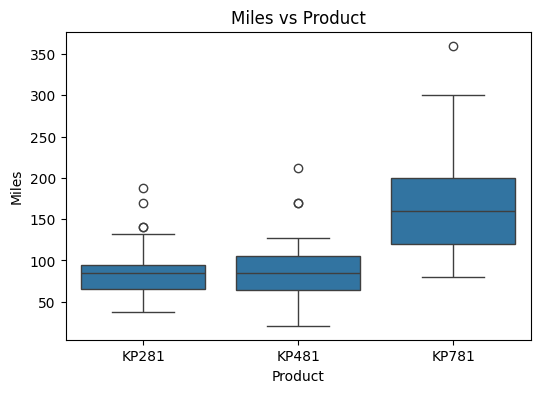

In [ ]:
# Product vs Gender
sns.countplot(x="Product", hue="Gender", data=df)
plt.show()

# Product vs MaritalStatus
sns.countplot(x="Product", hue="MaritalStatus", data=df)
plt.show()

# Boxplots: Age/Income/Usage/Fitness vs Product
for col in ["Age", "Income", "Usage", "Fitness", "Miles"]:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Product", y=col, data=df)
    plt.title(f"{col} vs Product")
    plt.show()

### Correlation Analysis
Analyze correlation among numerical features to check which factors are related.

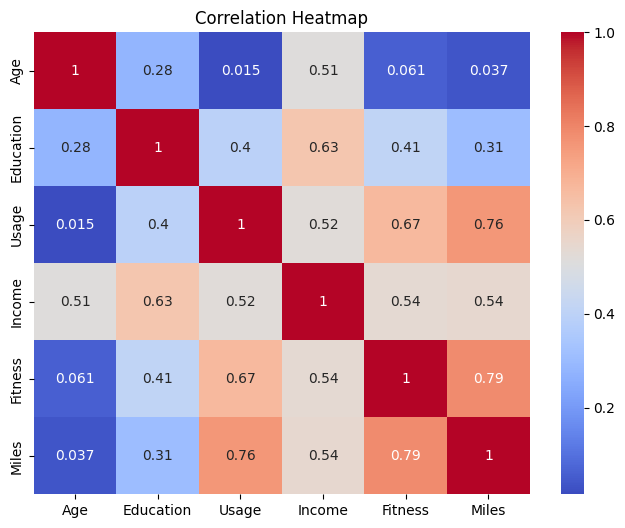

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

5. Customer Profiling by Product

### Customer Profiling
Summarize average Age, Income, Usage, Fitness, and Miles by product.

In [ ]:
profile = df.groupby("Product")[["Age", "Income", "Usage", "Fitness", "Miles"]].mean().round(1)
profile

,Age,Income,Usage,Fitness,Miles
Product,,,,,
KP281,28.6,46418.0,3.1,3.0,82.8
KP481,28.9,48973.6,3.1,2.9,87.9
KP781,29.1,75441.6,4.8,4.6,166.9


6. Probability Analysis

### Marginal Probabilities
Calculate % of customers who purchased each product.

In [ ]:
marginal = pd.crosstab(index=df["Product"], columns="count", normalize="all")*100
marginal

col_0,count
Product,
KP281,44.444444
KP481,33.333333
KP781,22.222222


### Conditional Probabilities
Compute probability of product purchase given Gender or Marital Status.

In [ ]:
# Gender × Product
gender_prob = pd.crosstab(df["Gender"], df["Product"], normalize="index")*100
gender_prob

# Marital Status × Product
marital_prob = pd.crosstab(df["MaritalStatus"], df["Product"], normalize="index")*100
marital_prob

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,44.859813,33.644860,21.495327
Single,43.835616,32.876712,23.287671


7. Two-Way Contingency Tables

Construct cross-tabs with both counts and probabilities.

In [ ]:
# Counts
pd.crosstab(df["Gender"], df["Product"])

# Normalized (conditional probability)
pd.crosstab(df["Gender"], df["Product"], normalize="index").round(2)

Product,KP281,KP481,KP781
Gender,,,
Female,0.53,0.38,0.09
Male,0.38,0.30,0.32


8. Insights & Recommendations

## Insights & Recommendations

- **KP281**:
  - Bought by older, lower-income customers with low fitness/usage.
  - Action: Market as entry-level treadmill with EMI & beginner fitness plans.

- **KP481**:
  - Preferred by middle-income, moderately fit customers.
  - Action: Bundle with fitness apps and running guides.

- **KP781**:
  - Purchased by younger, high-income, high-usage customers.
  - Action: Premium positioning with advanced features, personal coaching add-ons.

Overall:
- Gender and marital status have moderate influence.
- Income and fitness level strongly impact purchase decisions.

## 9. Direct Business Question Example

**Q:** What is the probability of a male customer buying a KP781 treadmill?

We calculate:

\[
P(\text{Product} = KP781 \mid \text{Gender} = Male) = \frac{\#(\text{Male \& KP781})}{\#(\text{Male})}
\]

In [ ]:
# Total male customers
male_customers = df[df["Gender"] == "Male"]
num_male = len(male_customers)

# Male customers who purchased KP781
num_male_kp781 = len(male_customers[male_customers["Product"] == "KP781"])

# Conditional probability
prob_male_kp781 = num_male_kp781 / num_male if num_male > 0 else None

print("Total Male Customers:", num_male)
print("Male Customers who purchased KP781:", num_male_kp781)
print("P(KP781 | Male) =", round(prob_male_kp781, 3))

Total Male Customers: 104
Male Customers who purchased KP781: 33
P(KP781 | Male) = 0.317


### Output & Interpretation

- Total Male Customers = **104**  
- Male Customers who purchased KP781 = **33**  

\[
P(\text{KP781} \mid \text{Male}) = \frac{33}{104} \approx 0.317 \; (31.7\%)
\]

**Interpretation:**  
A male customer has about a **31.7% probability** of buying a KP781 treadmill.  
This indicates KP781 appeals strongly to male fitness enthusiasts, supporting targeted **premium marketing campaigns**.

## 10. Direct Business Question Example (Extended)

**Q:** What is the probability of a male or female customer buying a KP781 treadmill?

In [ ]:
# Probability for Male
male_customers = df[df["Gender"] == "Male"]
num_male = len(male_customers)
num_male_kp781 = len(male_customers[male_customers["Product"] == "KP781"])
prob_male_kp781 = num_male_kp781 / num_male if num_male > 0 else None

# Probability for Female
female_customers = df[df["Gender"] == "Female"]
num_female = len(female_customers)
num_female_kp781 = len(female_customers[female_customers["Product"] == "KP781"])
prob_female_kp781 = num_female_kp781 / num_female if num_female > 0 else None

# Create comparison table
comparison = pd.DataFrame({
    "Gender": ["Male", "Female"],
    "Total Customers": [num_male, num_female],
    "KP781 Buyers": [num_male_kp781, num_female_kp781],
    "P(KP781 | Gender)": [round(prob_male_kp781, 3), round(prob_female_kp781, 3)]
})

comparison

,Gender,Total Customers,KP781 Buyers,P(KP781 | Gender)
0,Male,104,33,0.317
1,Female,76,7,0.092


### Output & Interpretation

| Gender | Total Customers | KP781 Buyers | P(KP781 \| Gender) |
|--------|----------------|--------------|---------------------|
| Male   | 104            | 33           | 0.317 (31.7%)       |
| Female | 76             | 7            | 0.092 (9.2%)        |

- Male customers have a **31.7% probability** of buying KP781.  
- Female customers have only a **9.2% probability** of buying KP781.  

**Business Insight:**  
- KP781 is **heavily skewed towards male customers**.  
- Marketing for KP781 should primarily target male buyers with **premium features, performance, and advanced fitness positioning**.  
- For female customers, KP781 adoption is very low — Aerofit may instead promote **KP281/KP481** as better fits, or reposition KP781 for women by highlighting **safety, convenience, and health benefits**.